# Matthew Kearney

#### Section 1 - Training Data Preparation

#### Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Preprocessing:
from sklearn.feature_selection import SelectKBest, chi2

# Settings: 
# pd.set_option('display.max_columns', None)


#### Load the training data 

In [16]:
df =pd.read_csv('train_data.csv')
df.describe

column_labels= df.columns.tolist()
obj = open('COLUMN_NAMES.txt', 'w')

for i in column_labels:
    obj.write(i + "\n")

obj.close()
X = df.iloc[:, 2:]

# m = number of rows
# n = number of columns
m, n = X.shape

y = df.iloc[:, 1:2]
column_labels

['Index',
 'Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth R

We can get an idea of the column data in "COLUMN_DATA.txt" and figure out that some of the columns may be very indicative of bankruptcy (or inersely of successful operations), and that some may not be useful at all (or very slightly) for our needs of determining bankruptcy. We must be careful as we turn our data from 95 dimensions to 50 dimensions, as many features may find use *upon* interaction with other features. We only seek to remove excess data, i.e. data that has proides no use to determining bankrupty, with feature engineering and . At the same time, we will want to drop out number of features to a more desirable, realistic and less computationally expensive number of features for model training. 

Without more extensive domain knowledge of economics and having the knack for determniing bankruptcy, we can try to bridge this gap using exploratory data analysis and preprocessing including feature extraction and engineering. We should get the best grasp for all the data as possible before moving forward with feature selection.

In [5]:
X_null= X.isnull().sum()

num_features_w_null = 95
for i in X_null:
    if i == 0:
        num_features_w_null= num_features_w_null - 1

num_features_w_null

0

None of our features have null data for any observations, though their may be presence of outliers in columns which may decrease model accuracy if left unchecked. We should check for presence of outliers and mitigate their weight onto our model to expect best generalization to the test set.

In [6]:
bankrupt = 0
for i in range(0, m):
    if y['Bankrupt?'][i] == 1:
        bankrupt = bankrupt + 1
print(bankrupt / m)
bankrupt


0.0340967797485793


198

There are a total of 198 companies or 3.41% of companies declaring bankruptcy in the training data. We should use feature engineering if a feature has linearity to 'Bankrupt?', it must be feature engineered. Only in the case that the column is non-linearly related to the target data, then we can keep the feature as it is. Feature extraction may be done if and only if it holds a strong correlation (+ or -) with other features (not with the target). We should also confirm the normal distribution for each feature.

#### Looking at the data

In [7]:
df

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442
2,2,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,...,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034
3,3,0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406
4,4,0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,5802,0,0.507483,0.547263,0.553188,0.596448,0.596448,0.998991,0.797393,0.809318,...,0.800601,0.003993,0.625135,0.596443,0.840625,0.286153,0.028366,0.568173,1,0.018670
5803,5803,0,0.553795,0.636993,0.606671,0.648323,0.648323,0.999388,0.798010,0.809855,...,0.853261,0.000778,0.623890,0.648322,0.843620,0.277068,0.026821,0.565297,1,0.050788
5804,5804,0,0.491639,0.559693,0.541250,0.597003,0.597003,0.998981,0.797405,0.809327,...,0.814292,0.004849,0.623857,0.597002,0.841610,0.280399,0.026902,0.565636,1,0.027161
5805,5805,0,0.513626,0.573321,0.555758,0.646665,0.646665,0.999066,0.797506,0.809396,...,0.815617,0.000476,0.623845,0.646663,0.842716,0.287670,0.026791,0.565159,1,0.017685


In [8]:
df.describe()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,...,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.0,5807.000000
mean,2903.000000,0.034097,0.505416,0.558893,0.553852,0.607958,0.607938,0.998726,0.797192,0.809081,...,0.807956,1.803513e+07,0.624030,0.607956,0.840407,0.280324,0.027446,0.565267,1.0,0.047736
std,1676.480838,0.181493,0.060808,0.065650,0.061613,0.017499,0.017480,0.014087,0.013731,0.014553,...,0.039062,3.706013e+08,0.009625,0.017499,0.015447,0.014511,0.011134,0.011678,0.0,0.049046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.224792,1.015560e-04,0.419045,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1451.500000,0.000000,0.476673,0.535679,0.527437,0.600448,0.600427,0.998969,0.797386,0.809312,...,0.796843,9.038045e-04,0.623634,0.600448,0.840121,0.276916,0.026791,0.565158,1.0,0.024395
50%,2903.000000,0.000000,0.503096,0.559911,0.552492,0.605969,0.605933,0.999022,0.797464,0.809376,...,0.810710,2.108343e-03,0.623879,0.605967,0.841176,0.278801,0.026808,0.565253,1.0,0.033687
75%,4354.500000,0.000000,0.535417,0.589212,0.583998,0.613856,0.613730,0.999094,0.797579,0.809469,...,0.826544,5.328774e-03,0.624169,0.613857,0.842352,0.281487,0.026914,0.565729,1.0,0.053393
max,5806.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,0.540672,0.736985,1.0,0.920638


In [9]:
# takes too long..
# import seaborn as sns
 
# data = df[df.columns.tolist()]
# sns.pairplot(data)

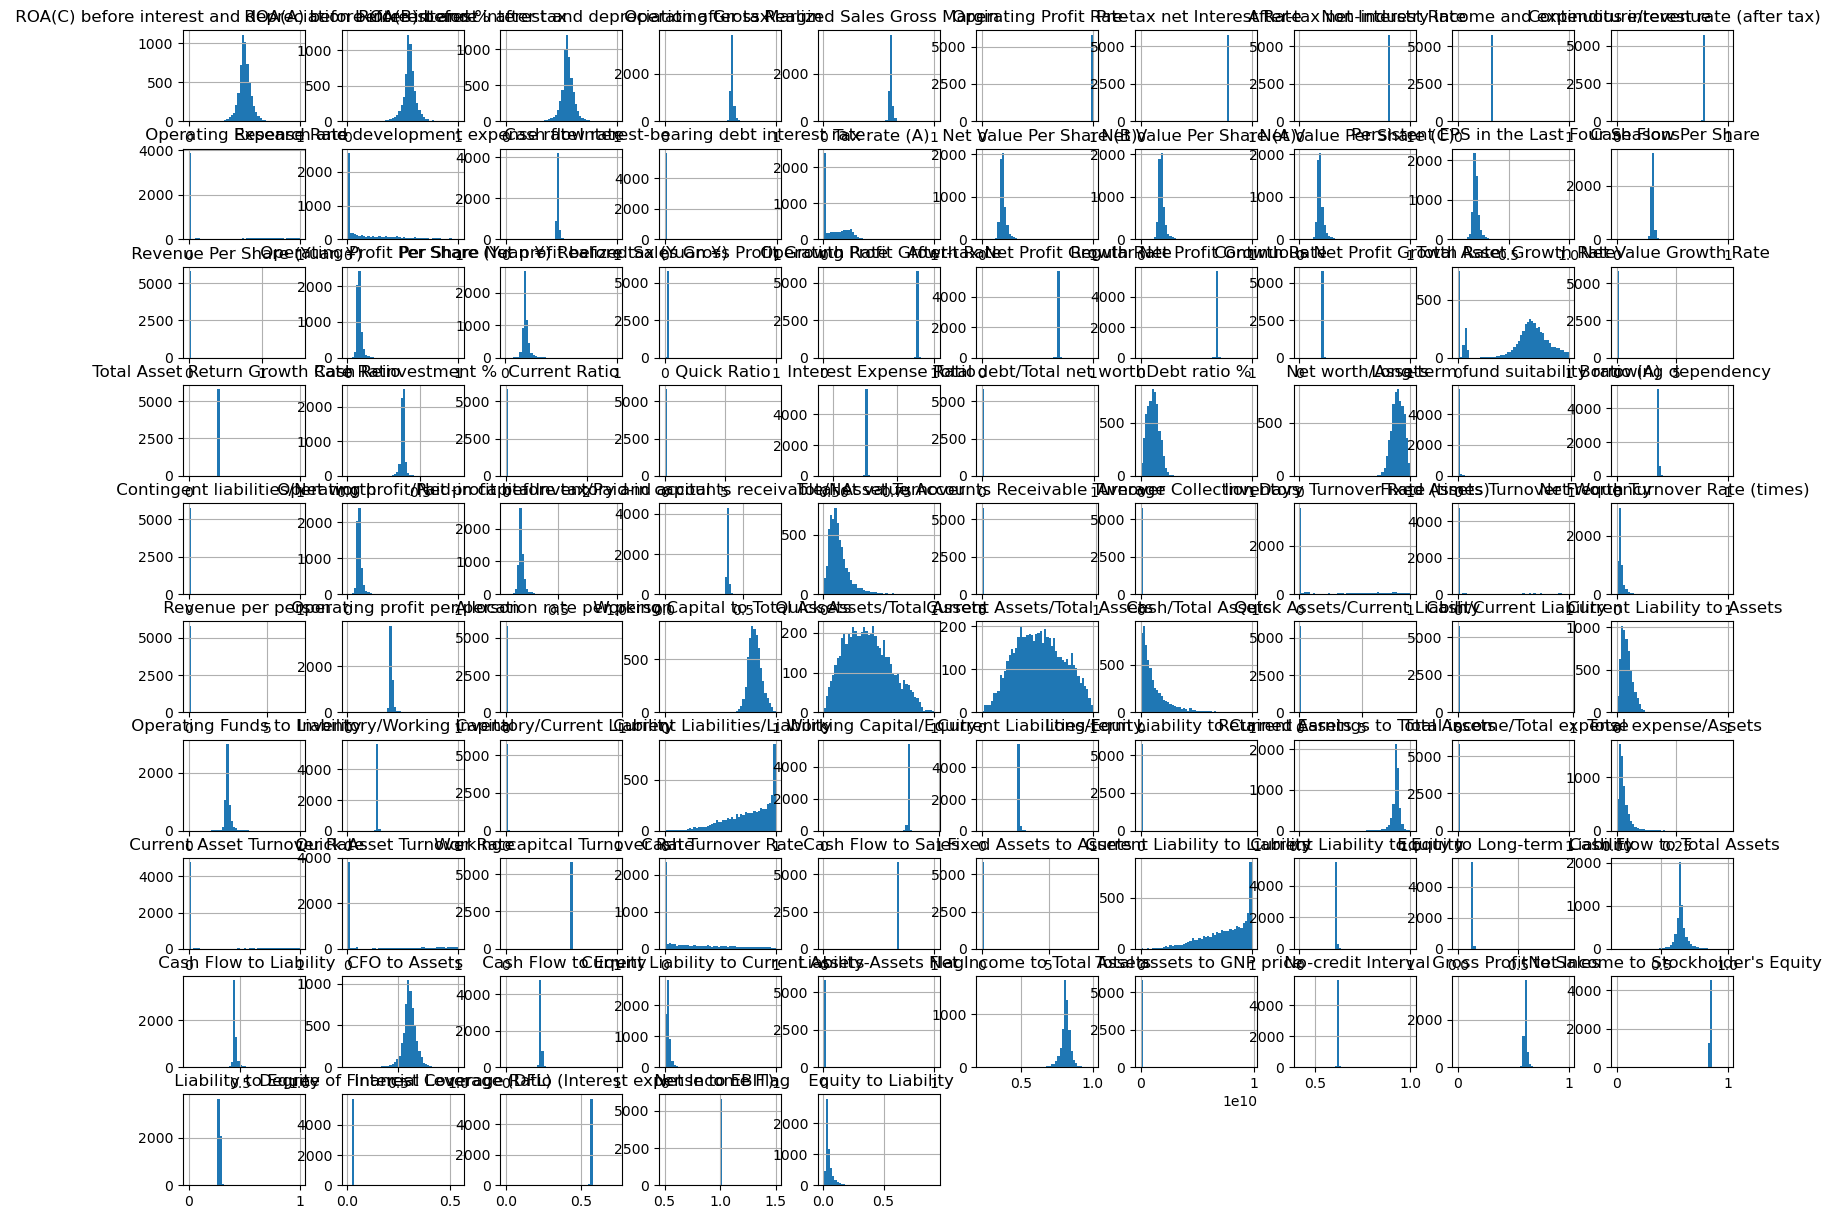

In [10]:
X.hist(bins=50, figsize=(20,15))
plt.show()

Some of these features show strong evidence of a gaussian distribution, but we can not rely on visualizations to determine linearity assumptions. We should use further statistical methods. 

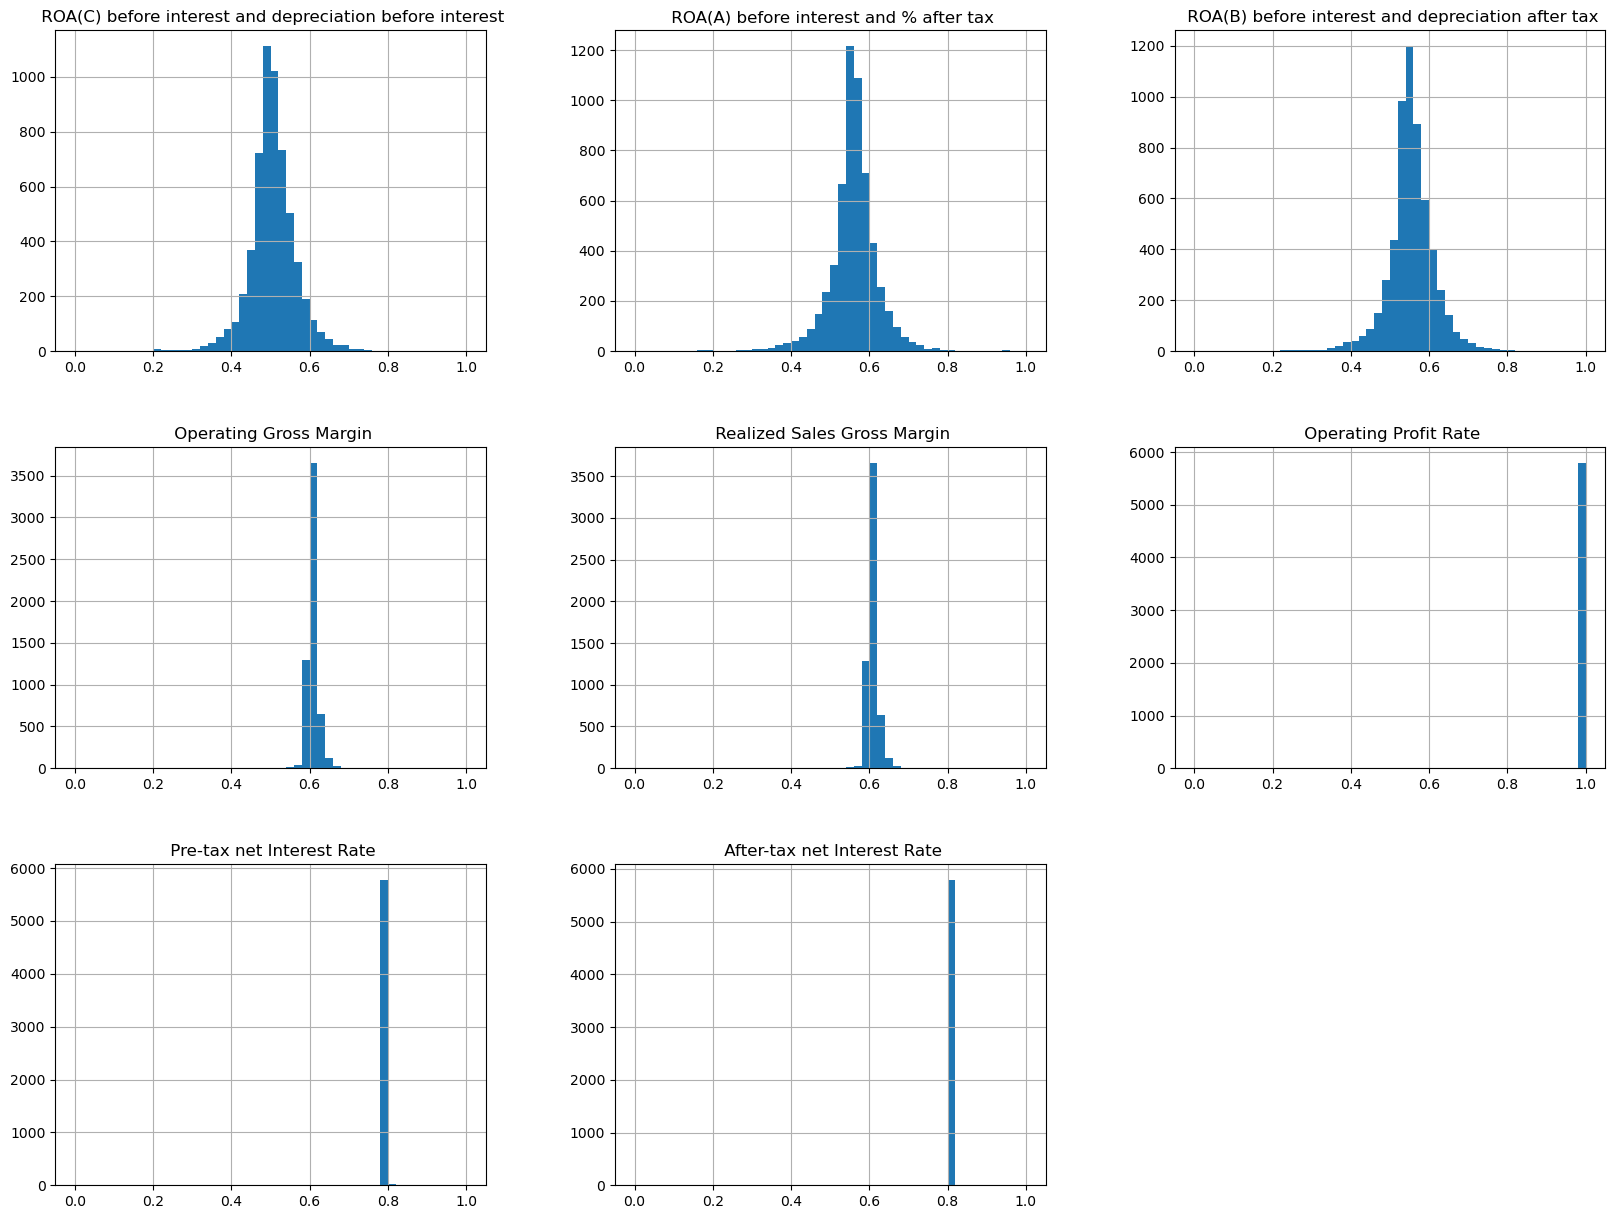

In [11]:
col = column_labels[2:10]
X[col][:].hist(bins=50, figsize=(20,15))
plt.show()

Looking at some of the data more closely (it will be very difficult to see all data distributions visually), we can see how much of the data is related. For example, ROA(C), ROA(A), and ROA(B) all fit very similar Gaussian distributions with $\mu ~ \approx 0.5 - 0.55$. Also, operating gross margins and realized gross margins are *roughly* the same in their normal tendencies showing their mean distributions at $\mu ~ \approx 0.6$. We can even identify and make inferences on relations between 'pre-tax net interest rate' with $\mu$ just under 0.8 and 'after-tax net interest rate' where $\mu$ is just above 0.8. All companies have the same interest rates pre and post tax, so the question of whether these two columns are helpful in determining bankrupty arises, as there are no patterns or distinctions to draw from here. The 'pre-tax net interest rate' with $\mu$ just under 0.8 and 'after-tax net interest rate' data are not normally distibuted and are essentially discrete (and uniform/ duplicated) indicating these features may not be useful in our model. We should look at the bigger picture of the data to ensure our data assumes normalcy, at which point we can begin engineering and extraction.

In [12]:
corr_matrix = df[df.columns.tolist()].corr('pearson') # opts: default, 'pearson', 'kendall', 'spearman
corr_matrix.style.background_gradient(cmap='coolwarm')

c:\Users\mkear\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\mkear\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


We should use insights from the above correlation matrix to get insights for between-feature correlations to be permitted for feature extraction. 

In [13]:
corr_matrix['Bankrupt?'].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.255948
 Current Liability to Assets                                0.195163
 Borrowing dependency                                       0.194085
 Liability to Equity                                        0.178064
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.258319
 ROA(B) before interest and depreciation after tax         -0.269430
 ROA(A) before interest and % after tax                    -0.279412
 Net Income to Total Assets                                -0.319499
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 97, dtype: float64

The correlation of any target to the target never exceeds 32%, which is considered moderate linear relationship. We should see further if any features are linearly related to the target. 

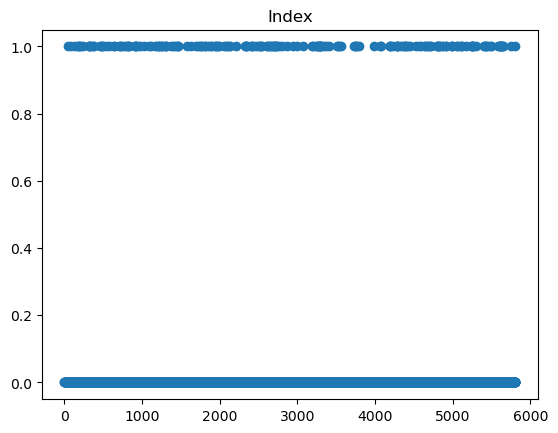

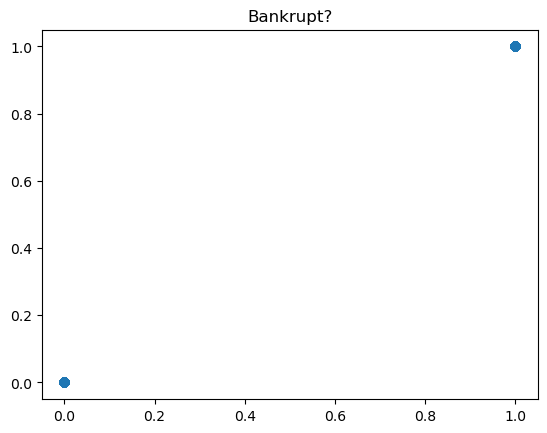

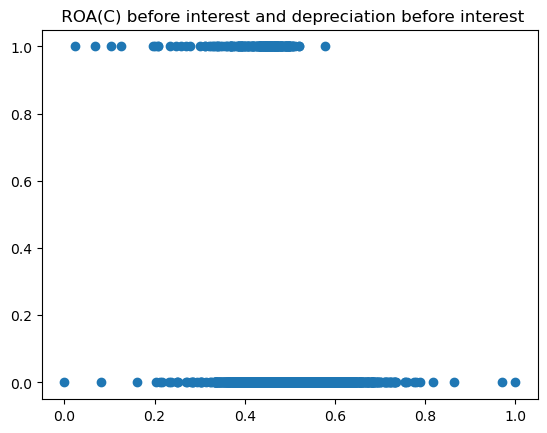

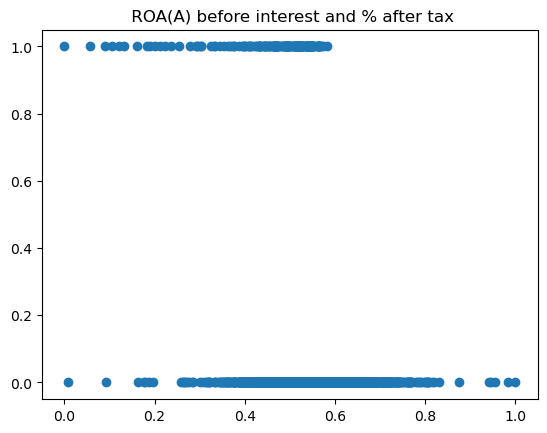

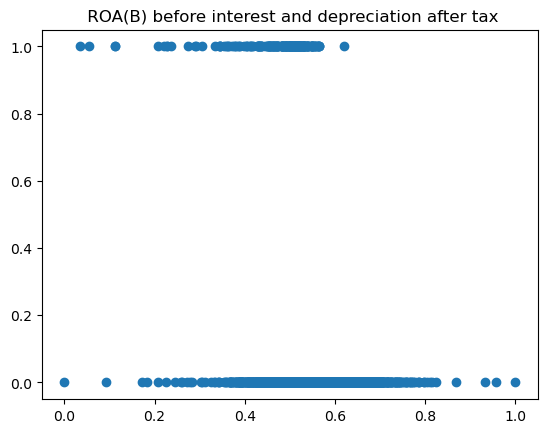

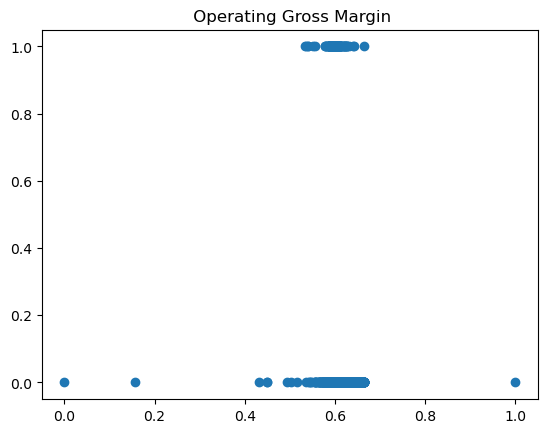

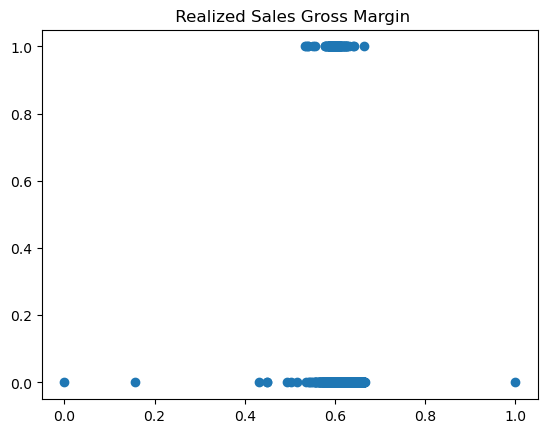

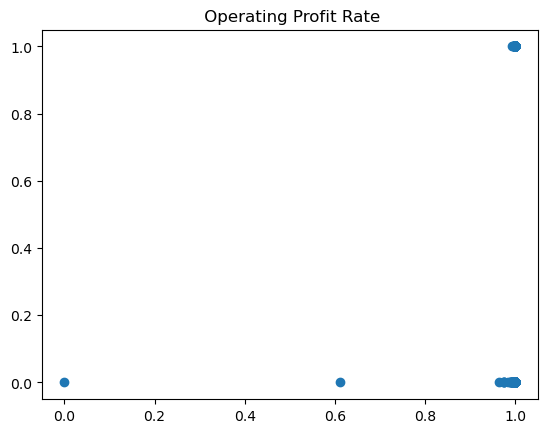

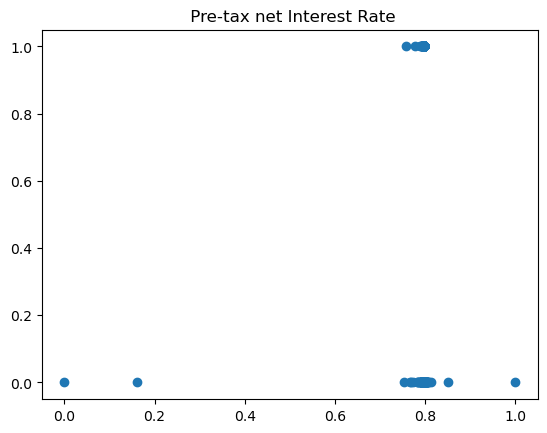

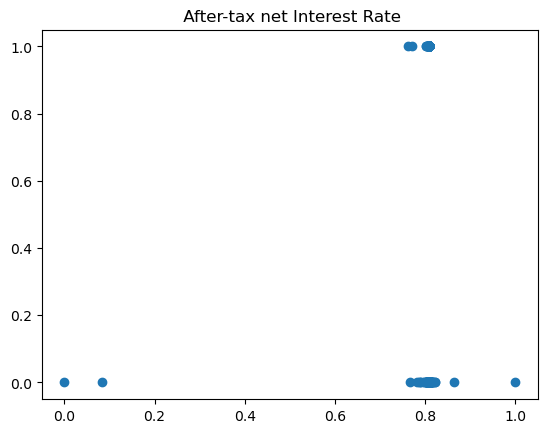

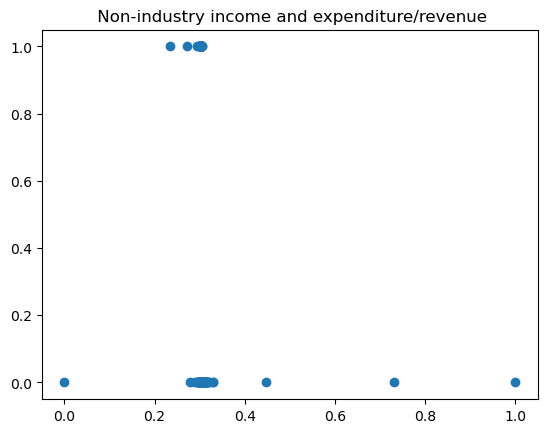

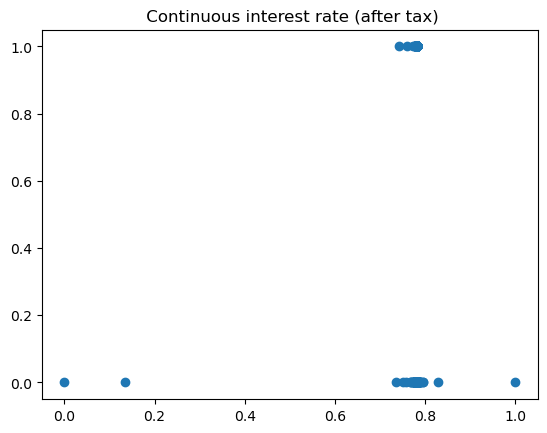

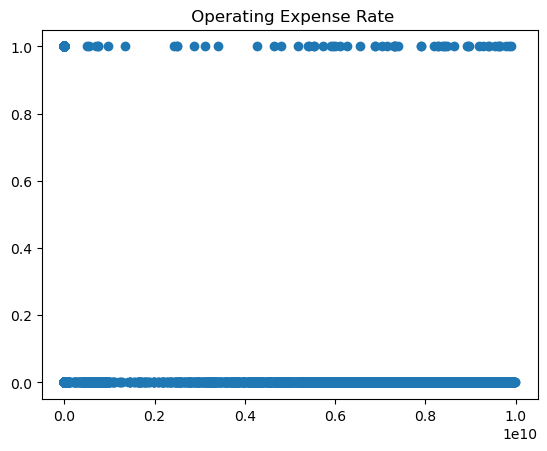

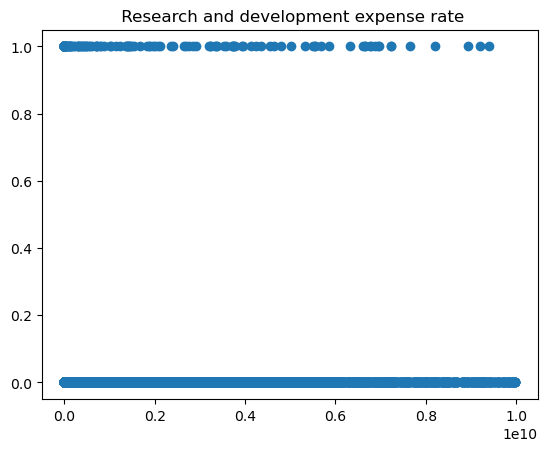

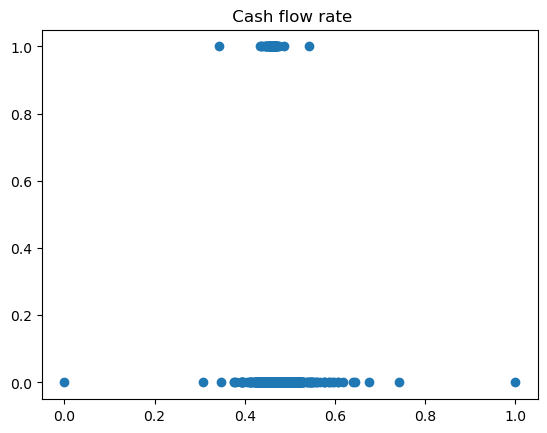

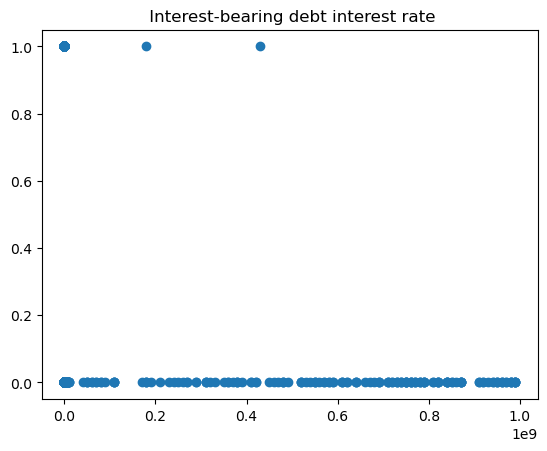

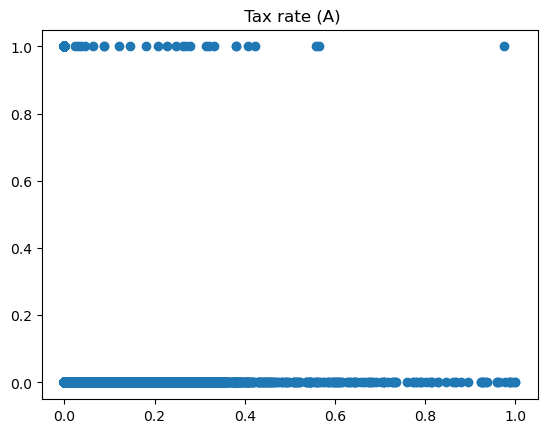

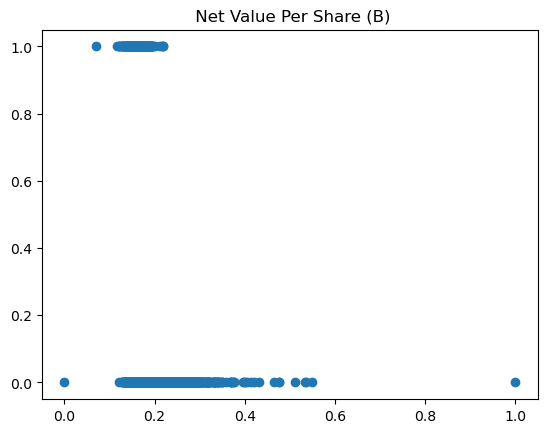

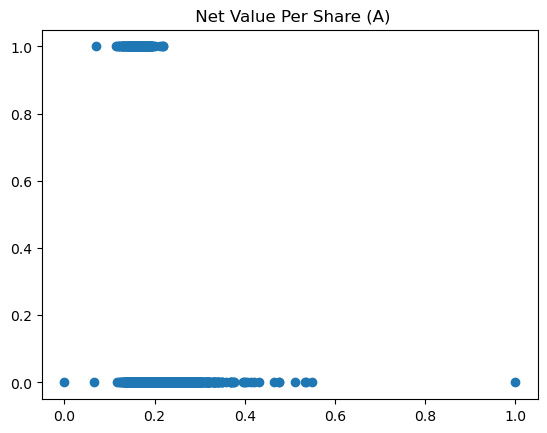

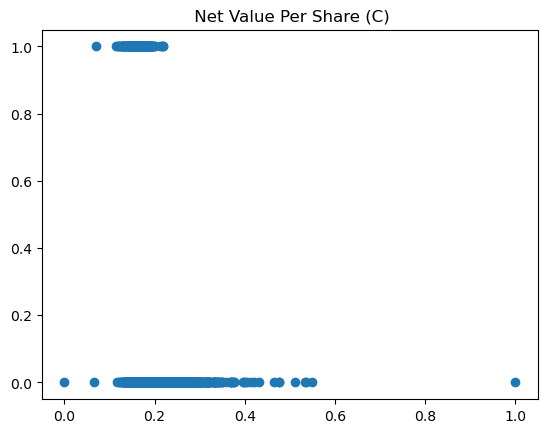

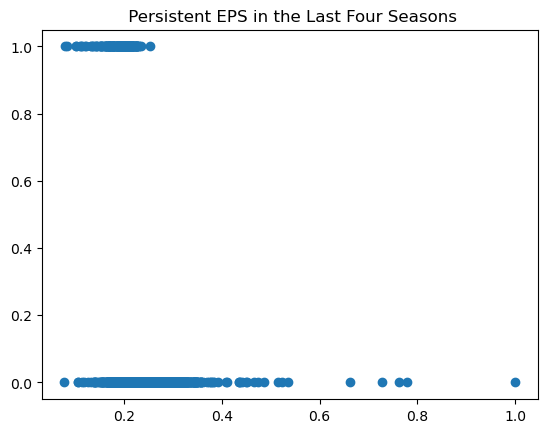

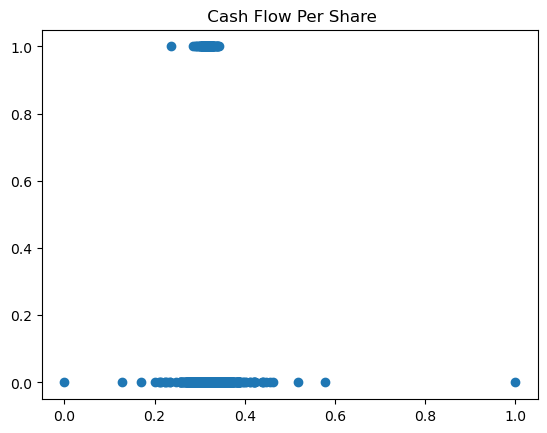

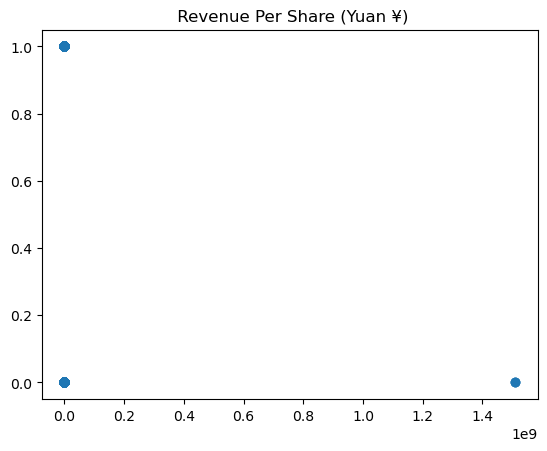

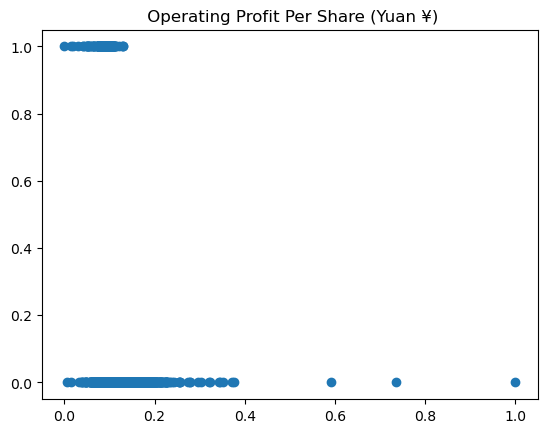

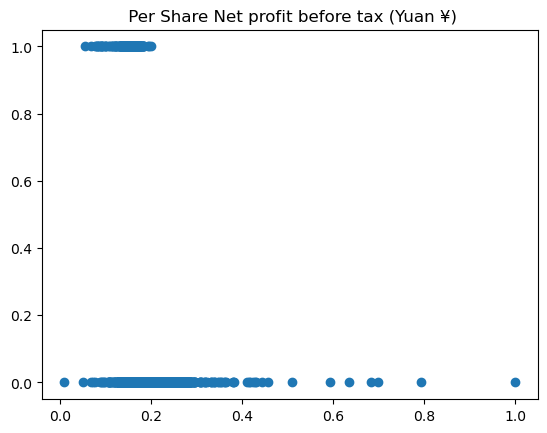

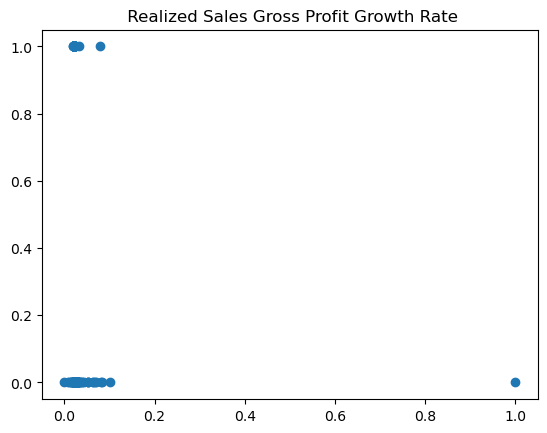

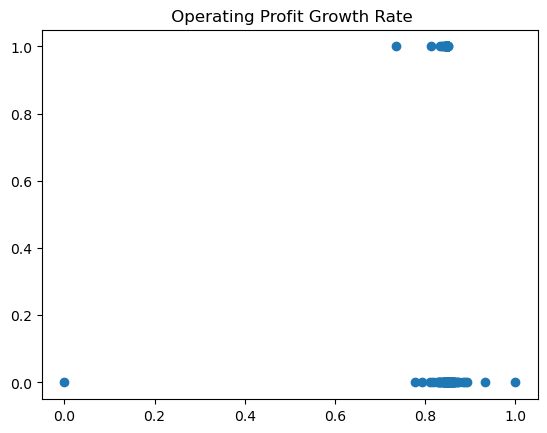

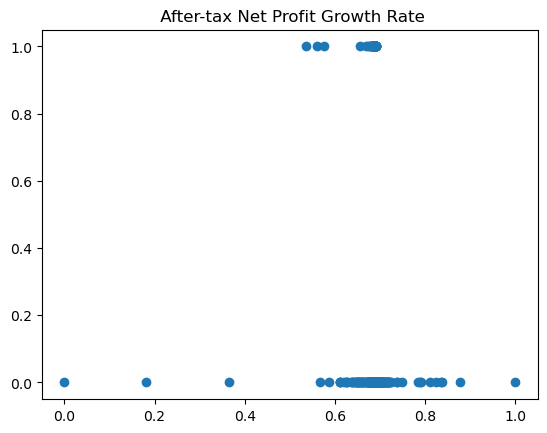

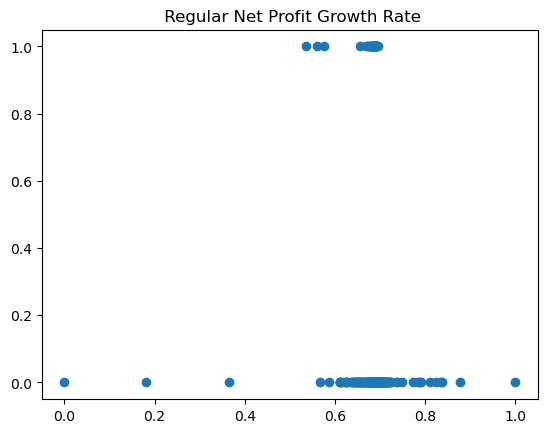

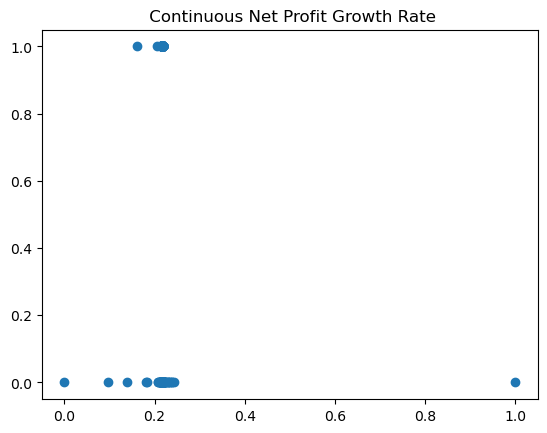

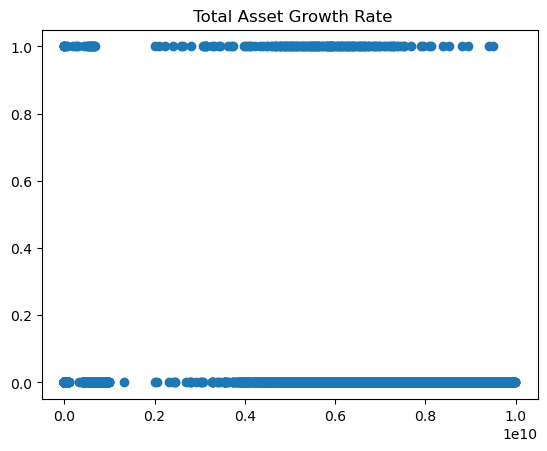

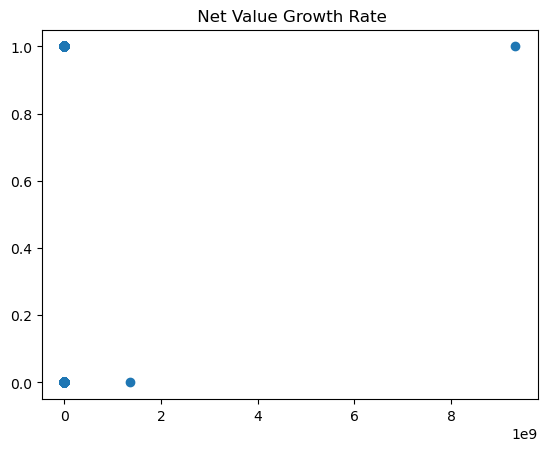

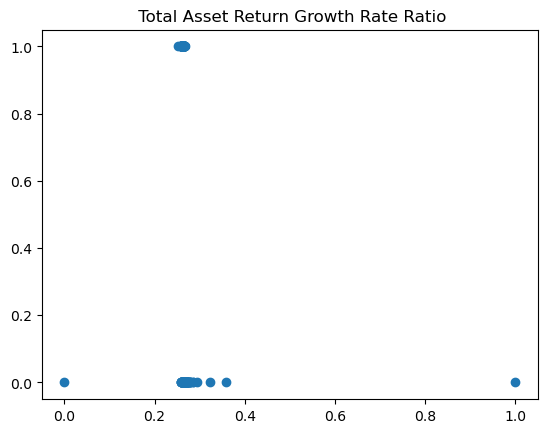

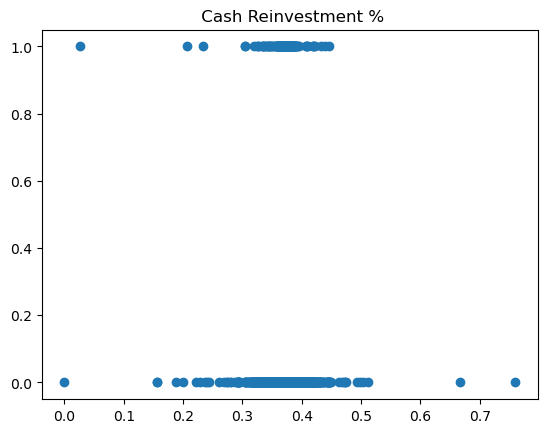

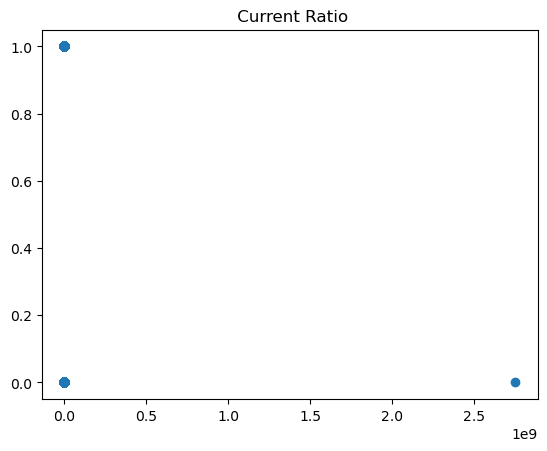

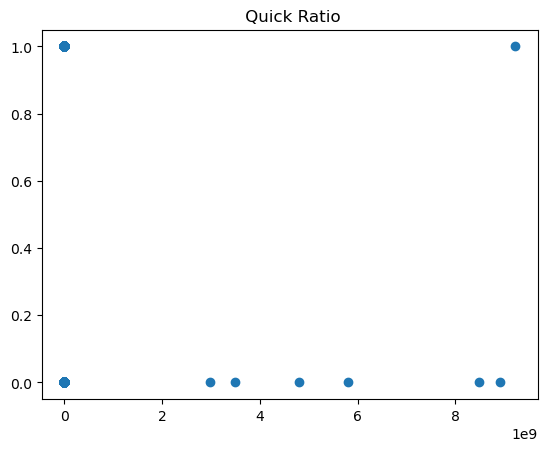

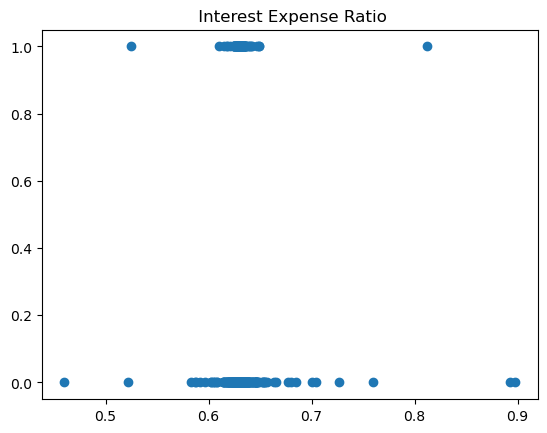

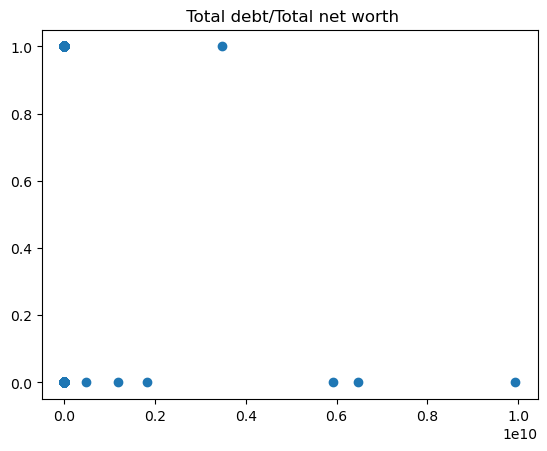

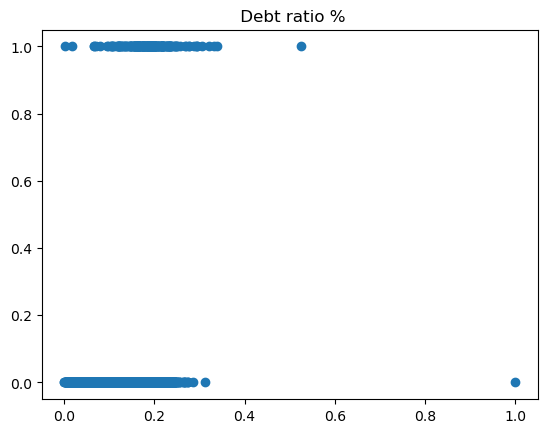

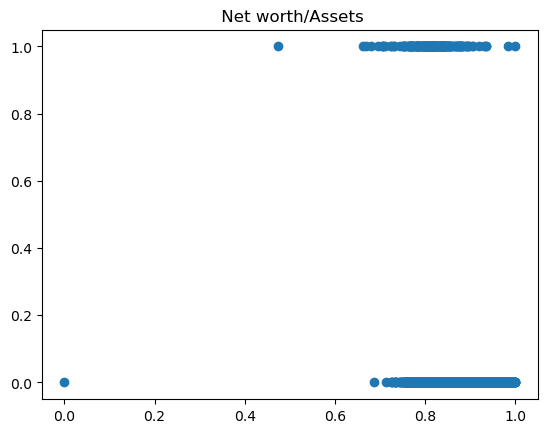

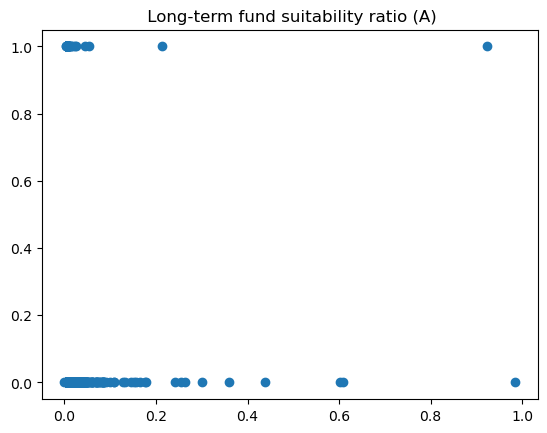

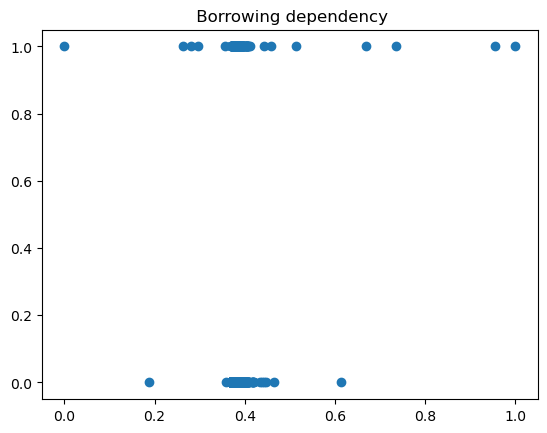

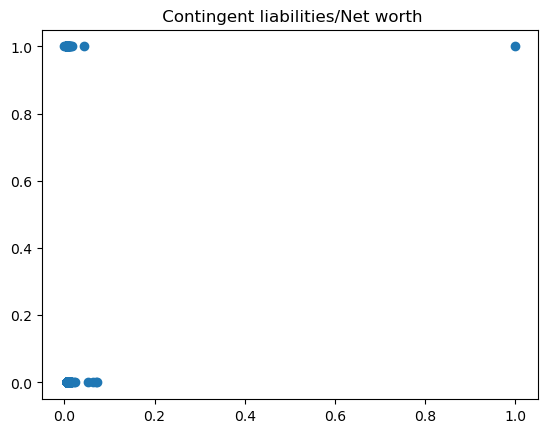

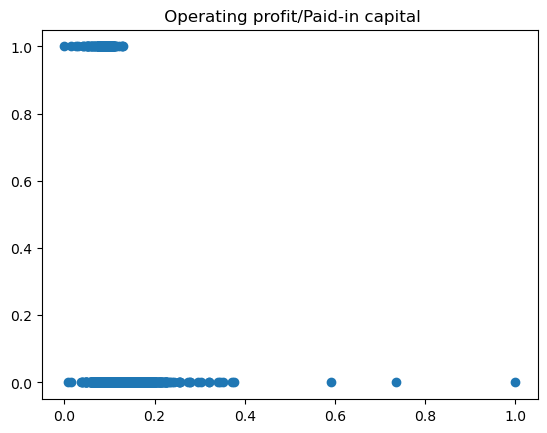

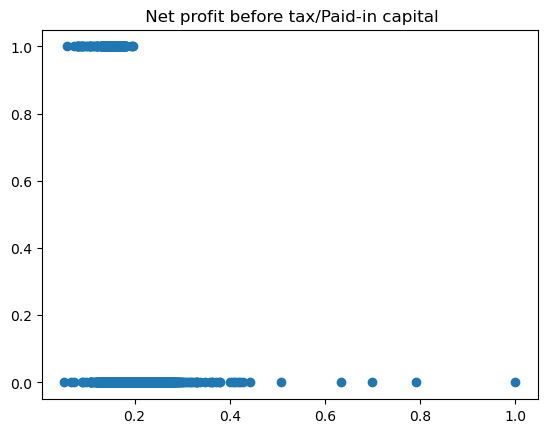

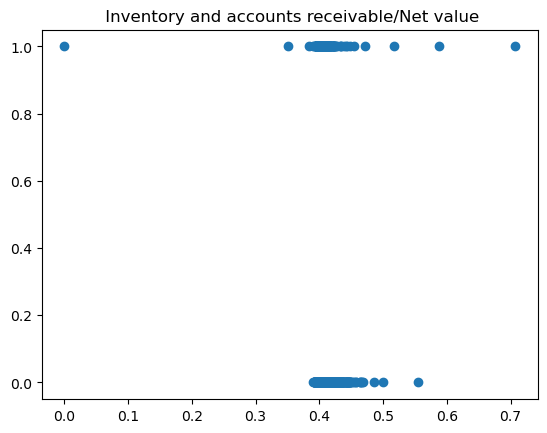

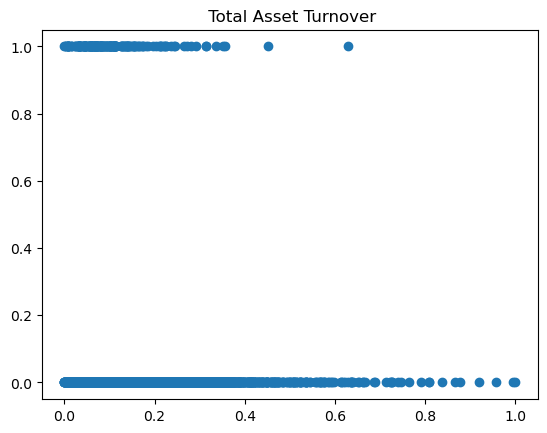

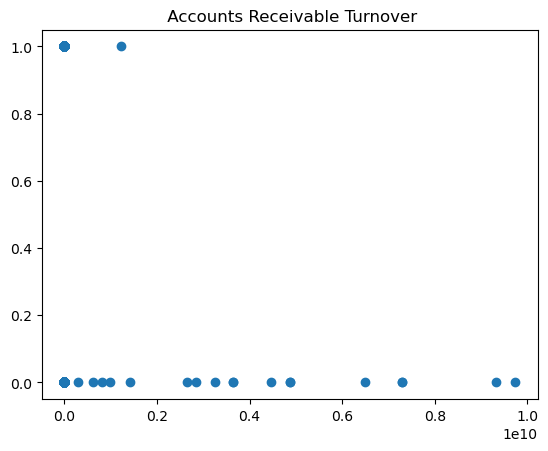

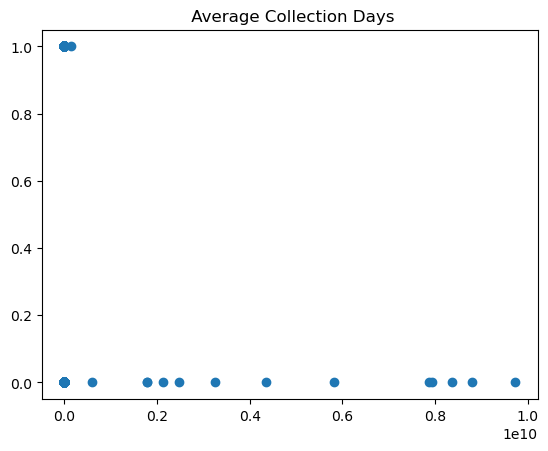

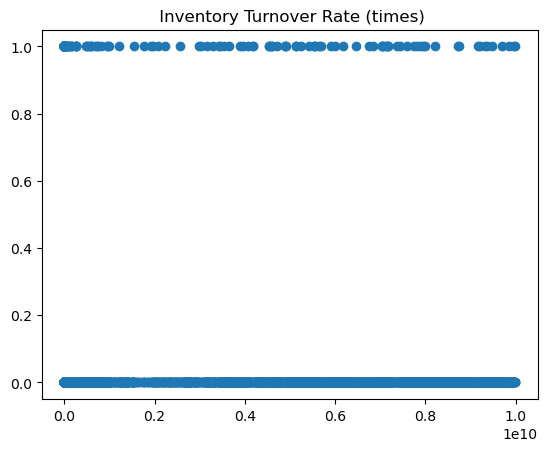

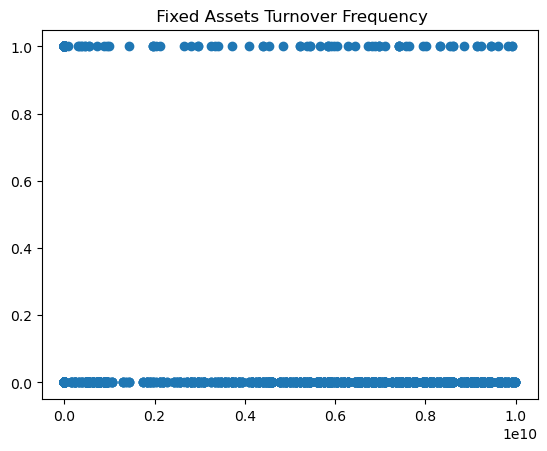

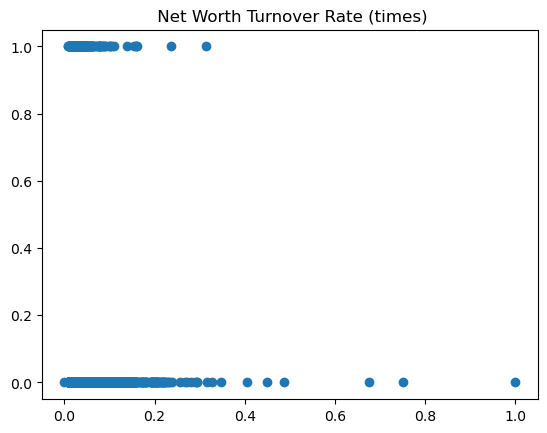

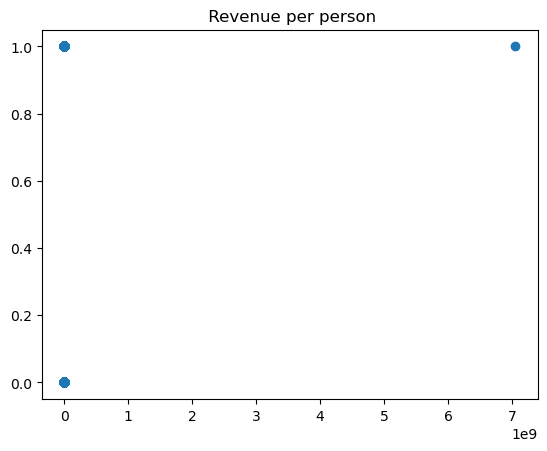

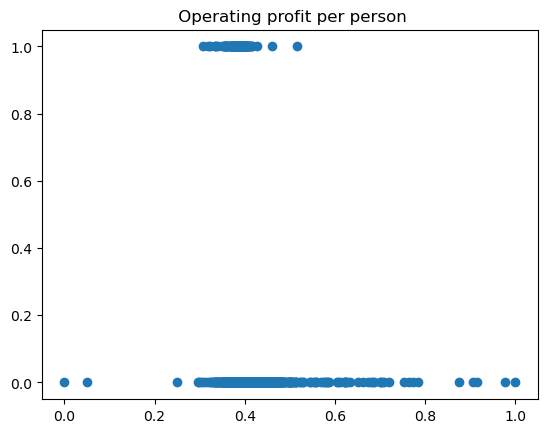

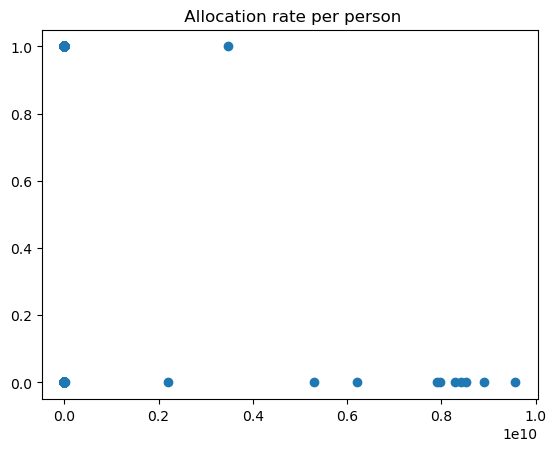

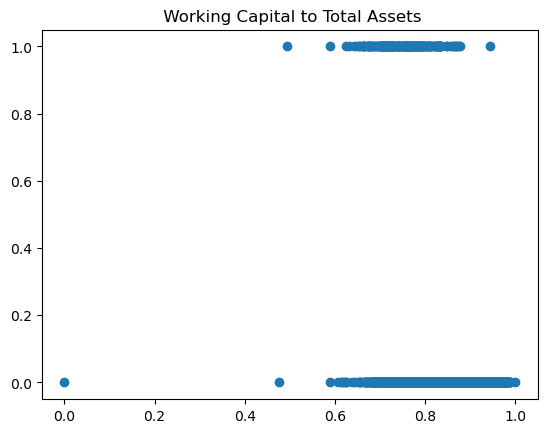

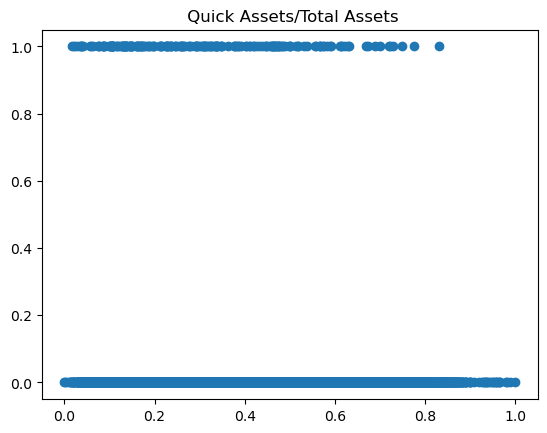

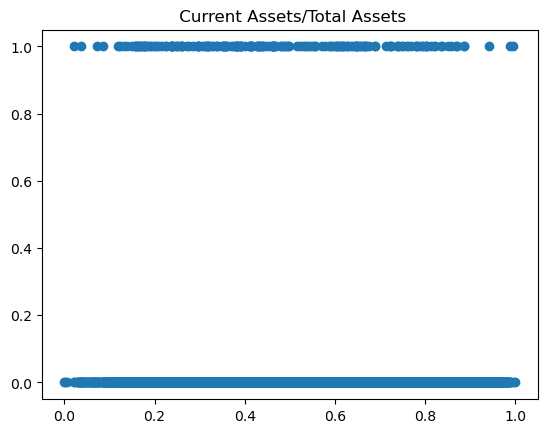

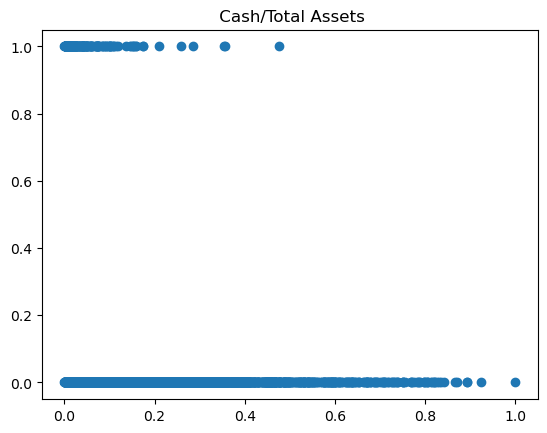

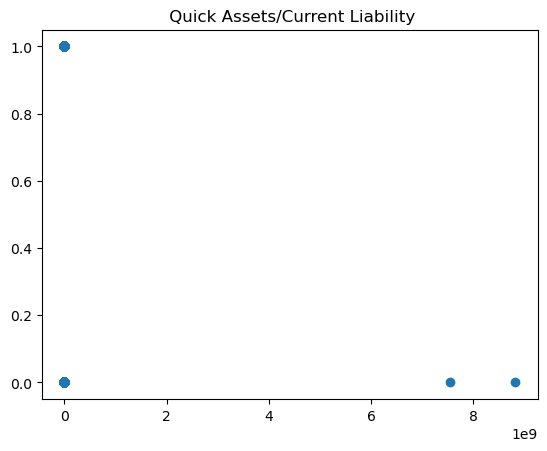

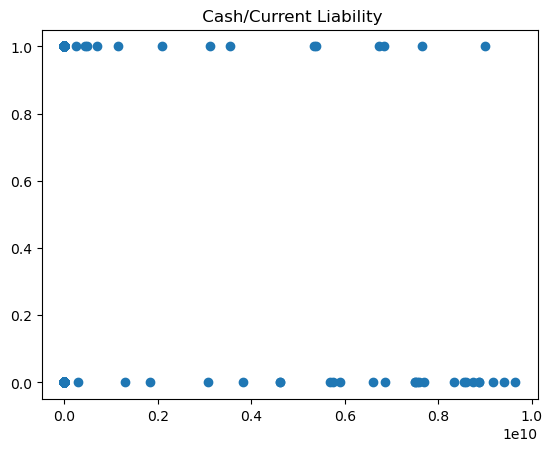

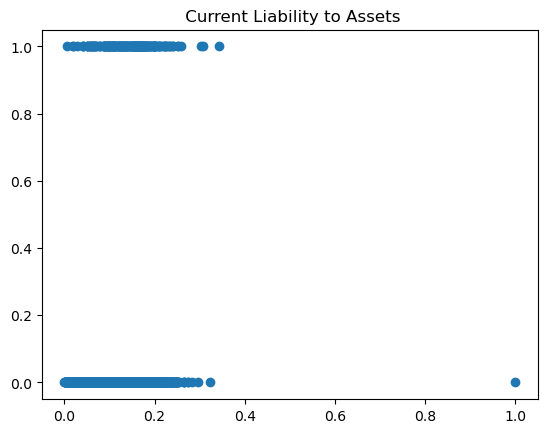

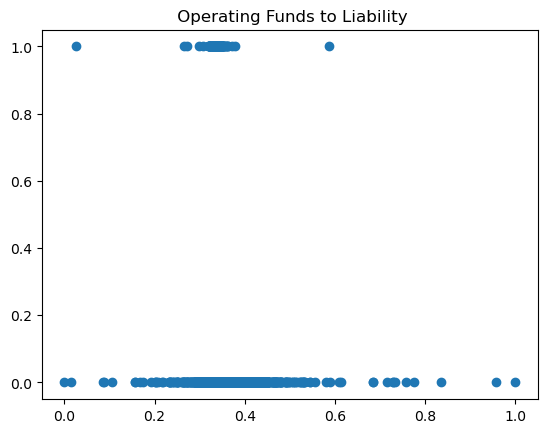

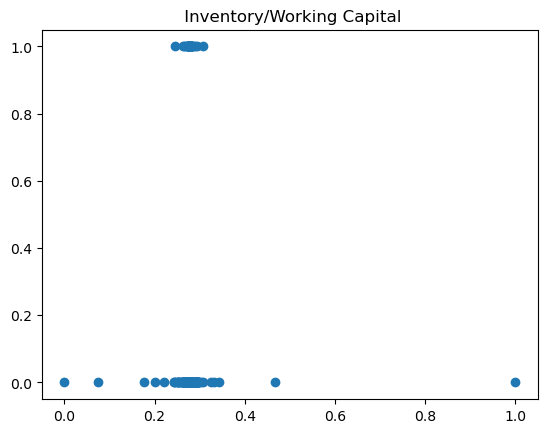

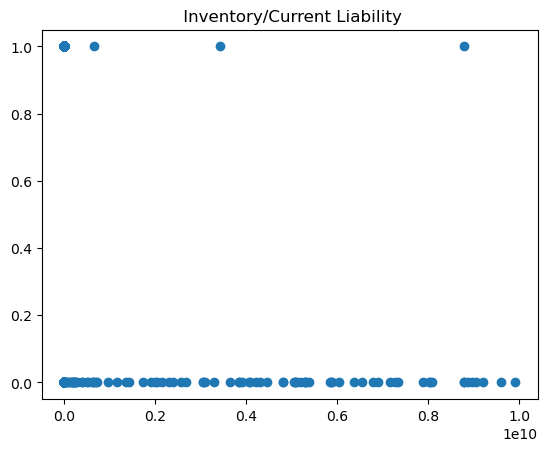

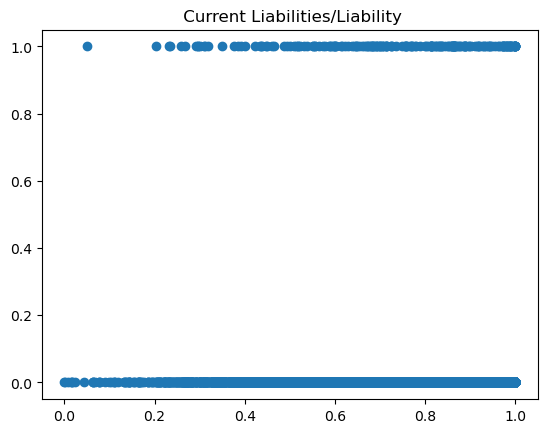

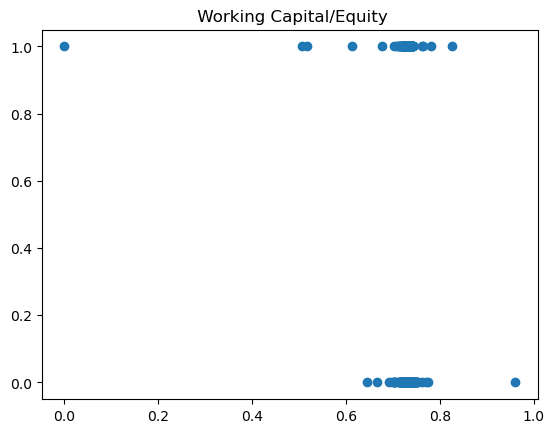

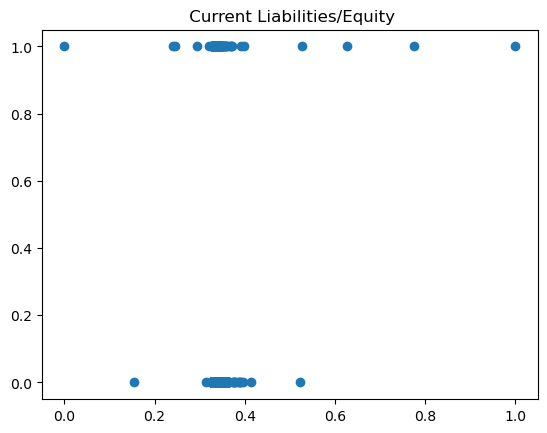

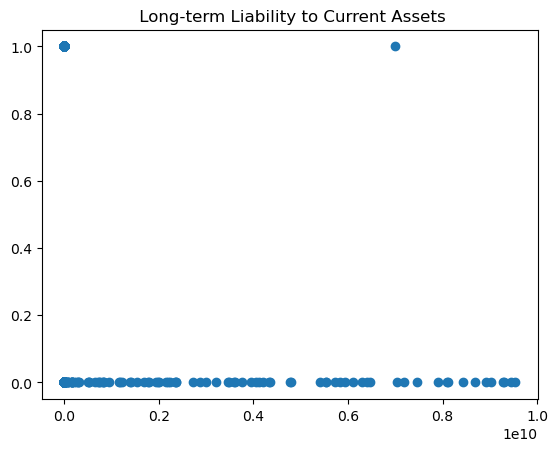

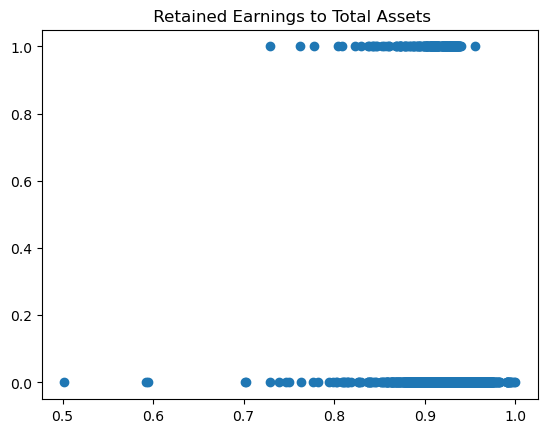

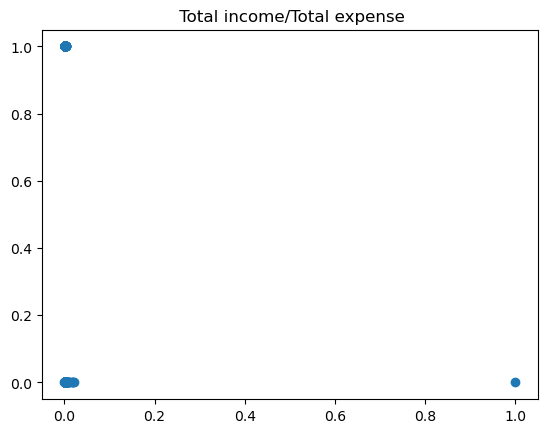

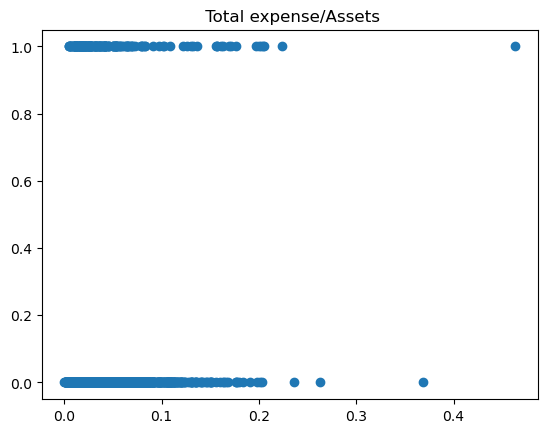

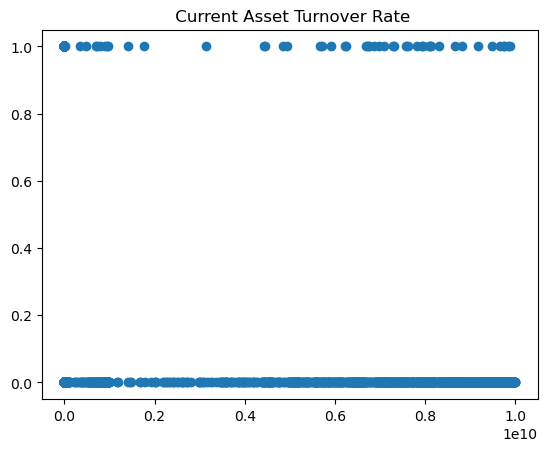

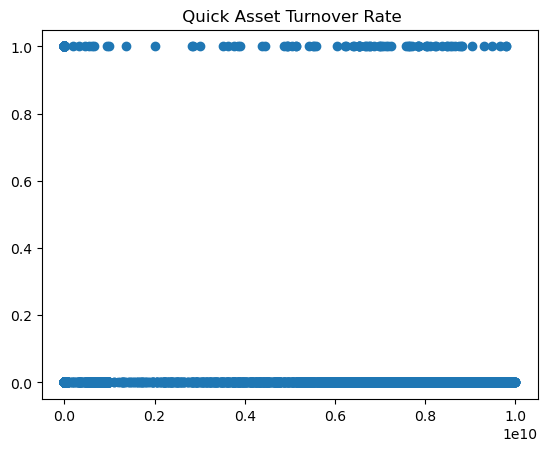

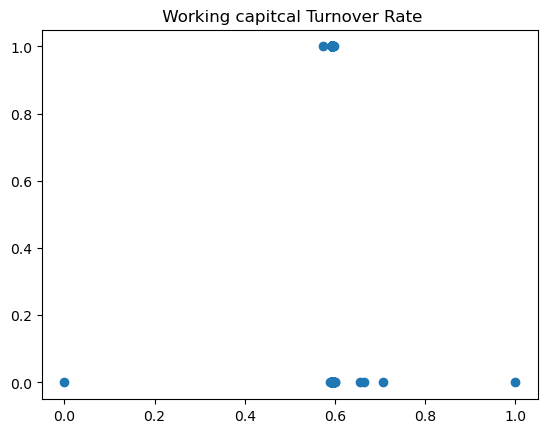

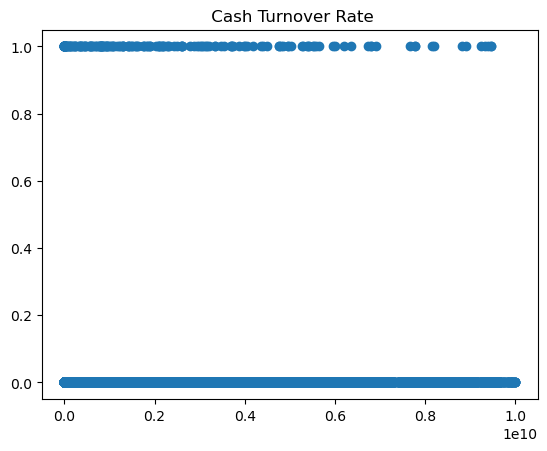

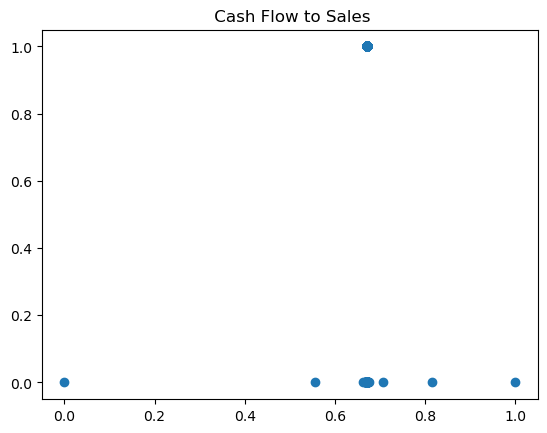

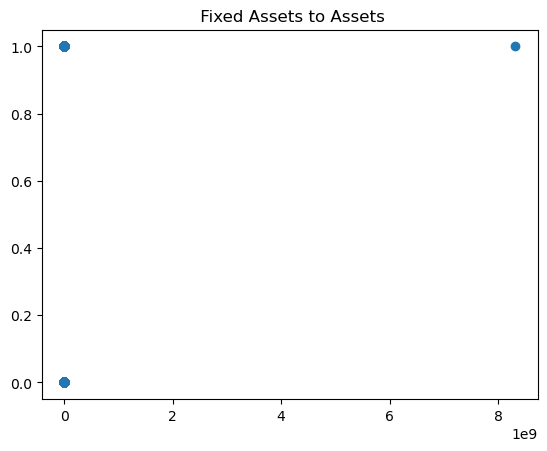

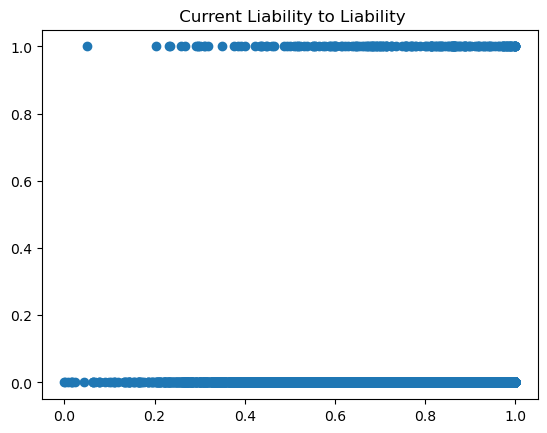

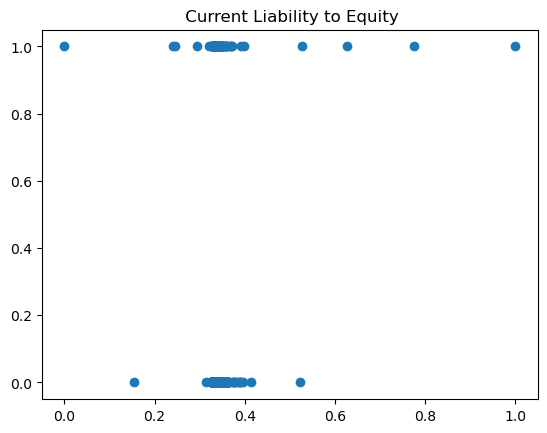

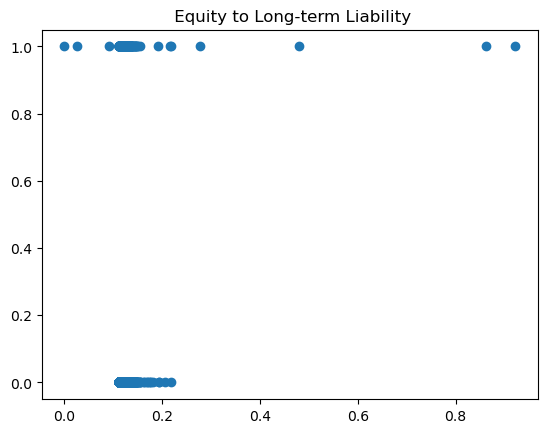

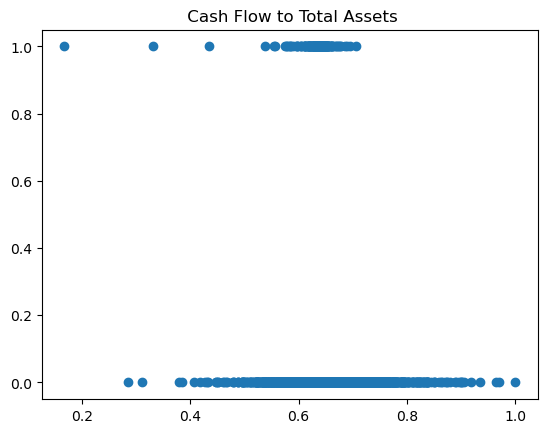

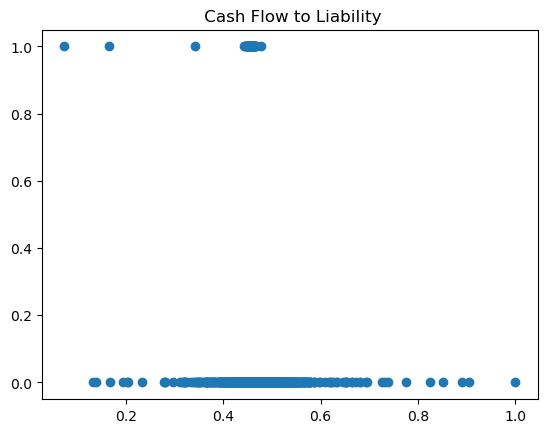

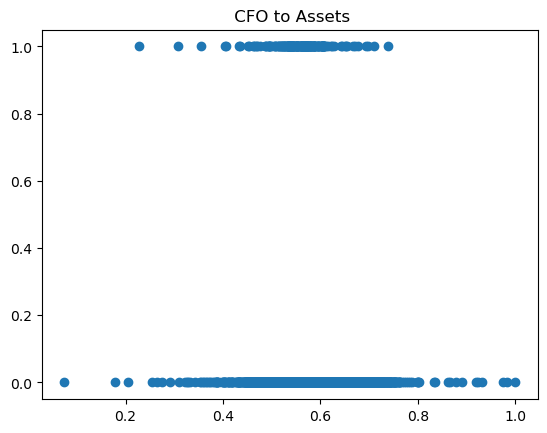

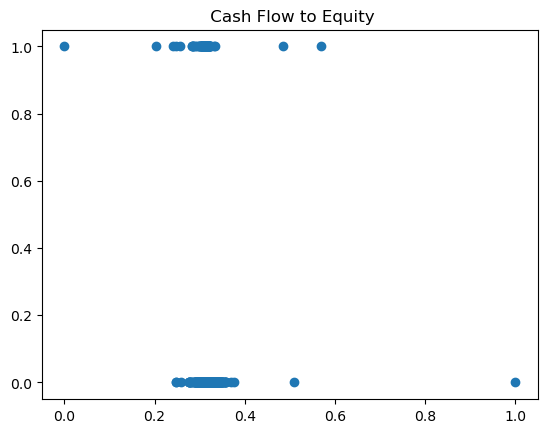

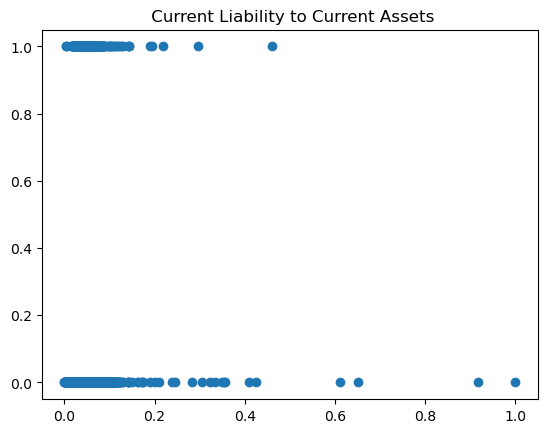

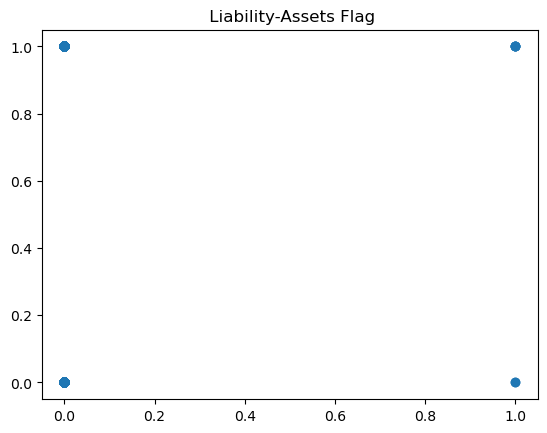

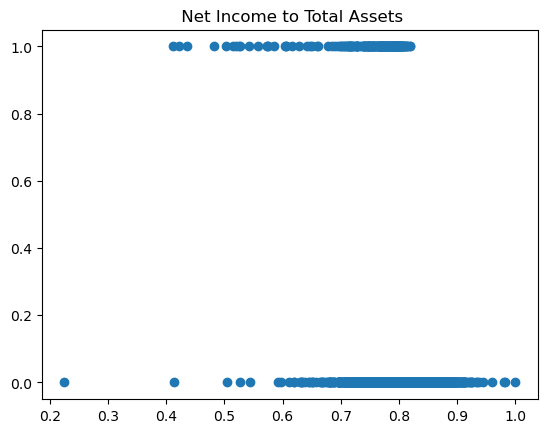

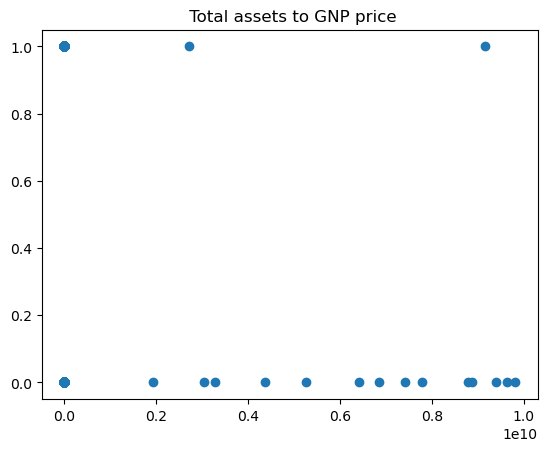

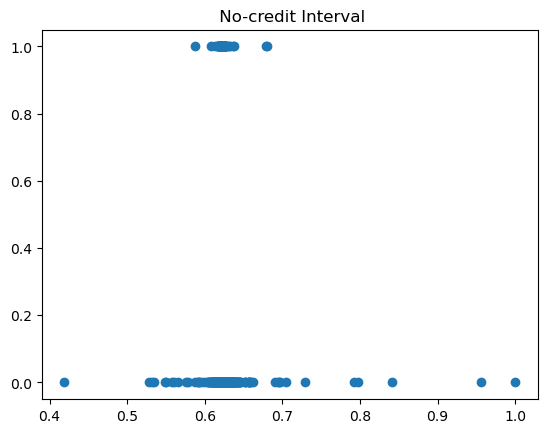

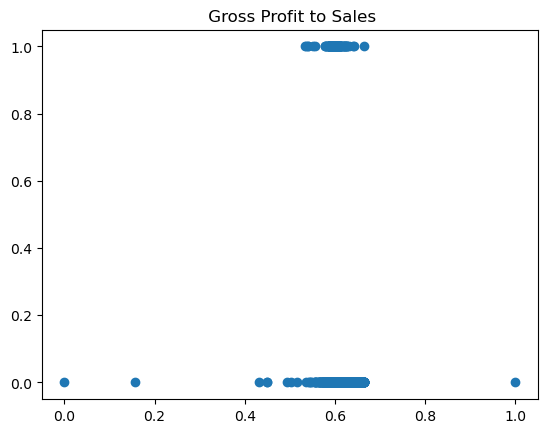

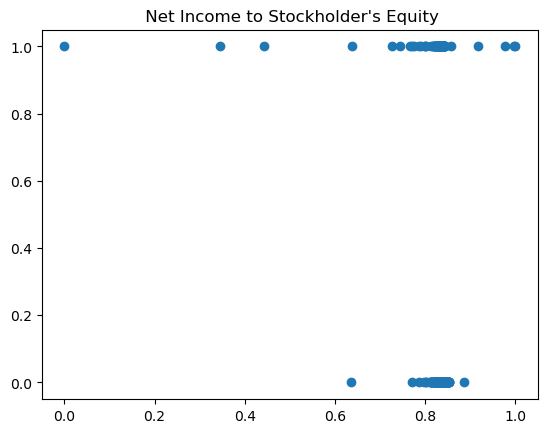

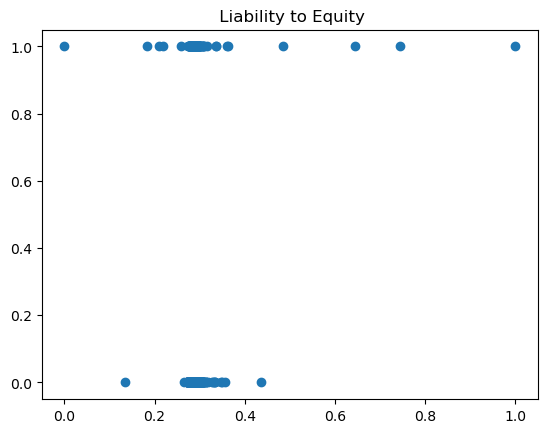

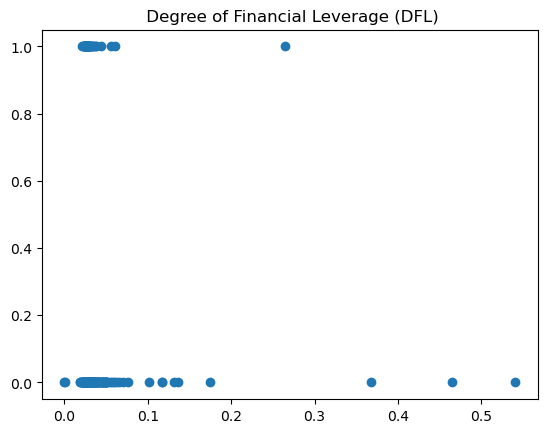

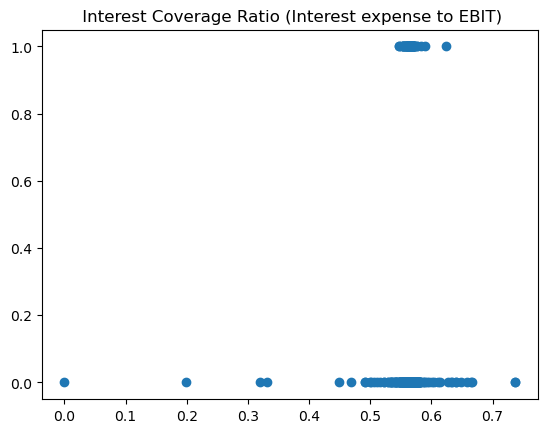

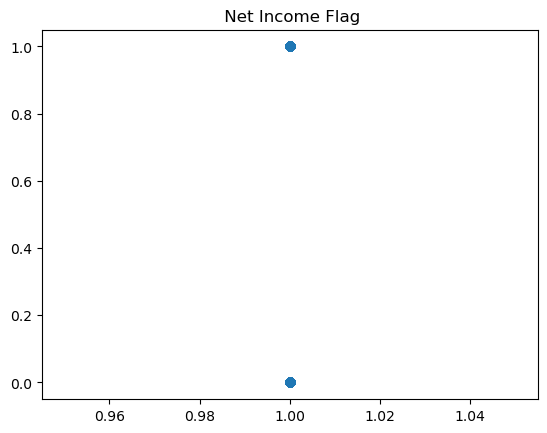

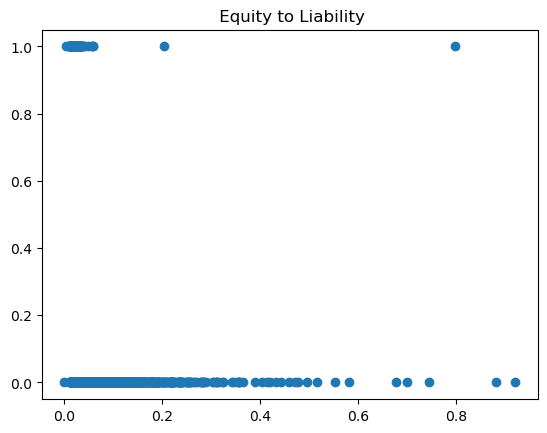

In [21]:

# from pandas.plotting import scatter_matrix

# scatter_matrix(df[df.columns.tolist()], figsize=(12,8))
# plt.show()
for i in column_labels:
    plt.title(i)
    plt.scatter(df[i], y)
    plt.show()

# print(len(df[column_labels[0]]))
# print(len(y))
# plt.scatter(df[column_labels[0]], y)
# plt.show()